In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'stix'
import numpy as np
from scipy.ndimage import gaussian_filter

In [2]:
def get_Sq2D_data(filename, CS=False):
    if CS:
        data = np.genfromtxt(filename, delimiter=",", skip_header=0)
        qB = np.linspace(-0.25 * np.pi, 0.25 * np.pi, 51)
        Sq2D = data[:, :]
    else:
        data = np.genfromtxt(filename, delimiter=",", skip_header=1)
        qB = data[2, 21:]
        Sq2D = data[6:, 21:]
    return np.array(Sq2D).T, np.array(qB)


In [3]:
from matplotlib.colors import LinearSegmentedColormap

def create_uniform_colormap(rgb_list, name='custom_colormap'):
    """
    Create a uniform colormap from a list of RGB colors.

    Parameters:
    rgb_list (list of tuples): List of RGB colors.
    name (str): Name of the colormap.

    Returns:
    LinearSegmentedColormap: The created colormap.
    """
    return LinearSegmentedColormap.from_list(name, rgb_list)

# Example usage:
rgb_kbcw = [(0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)]
custom_cmap = create_uniform_colormap(rgb_kbcw)

In [4]:
def plot_Sq2D_g(tex_lw=240.71031, ppi=72):
    L = 200
    kappa = 10.0
    f = 0.00
    gL = 0.00
    gL = [0.00, 0.30, 0.90]
    folder = "../data/20240920_precision"
    fig, axs = plt.subplots(1, len(gL), figsize=(tex_lw / ppi * 1, tex_lw / ppi * 0.42), sharex="row", sharey="row")
    # plt.rc("text", usetex=True)
    # plt.rc("text.latex", preamble=r"\usepackage{physics}")
    
    # plot Sq2D for various gL
    for i in range(len(gL)):
        # config

        # 2DSq

        filename = f"{folder}/obs_L{L:.0f}_kappa{kappa:.0f}_f{f:.2f}_gL{gL[i]:.2f}.csv"
        Sq2D, qB = get_Sq2D_data(filename)
        qBx, qBz = np.meshgrid(qB*L, qB*L)
        print(np.min(Sq2D), np.max(Sq2D))
        Sq2D = gaussian_filter(Sq2D, 0.5)
        axs[i].pcolormesh(qBx, qBz, np.log10(Sq2D), vmax=0, vmin=-2, cmap=custom_cmap, shading="gouraud")
        # Cs = axs[i].contour(qBx, qBz, np.log10(Sq2D), vmax=0, vmin=-3, levels=np.linspace(-3, 0, 7), colors="gray", linewidths=0.5, linestyle=":")
        # axs[i].clabel(Cs, Cs.levels, inline=True, fontsize=12, fmt="%1.1f", colors="black")
        axs[i].set_xlabel(r"$Q_xL$", fontsize=20, labelpad=-0.0)
        axs[i].tick_params(which="both", direction="in", top="on", right="on", labelbottom=True, labelleft=False, labelsize=18)
        axs[i].xaxis.set_major_locator(plt.MultipleLocator(100))
        axs[i].xaxis.set_minor_locator(plt.MultipleLocator(50))
        axs[i].yaxis.set_major_locator(plt.MultipleLocator(100))
        axs[i].yaxis.set_minor_locator(plt.MultipleLocator(50))
        # axs[i].set_title(r"$\gamma L = $" + f"{gL[i]:.1f}", fontsize=20, pad=2.5)
        axs[i].set_aspect("equal")

    axs[0].set_ylabel(r"$Q_yL$", fontsize=20, labelpad=-0.0)
    axs[0].tick_params(which="both", direction="in", top="on", right="on", labelbottom=True, labelleft=True, labelsize=18)

    plt.tight_layout(pad=2)
    # plt.tight_layout()
    # plt.savefig("./figures/Sq2D_g.pdf", format="pdf")
    # plt.savefig("./figures/Sq2D_g.png", format="png", dpi=300)
    plt.show()
    plt.close()
    


0.0141814 1.0
0.0111216 1.0
0.00356127 1.0


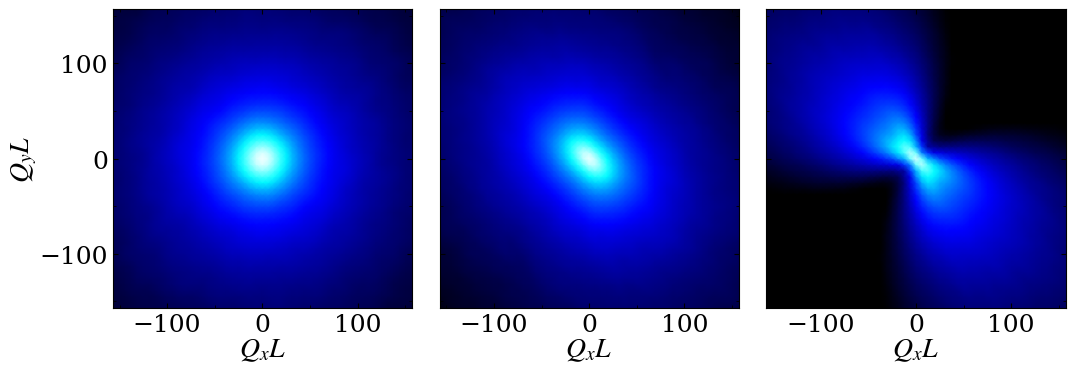

In [5]:
plot_Sq2D_g(tex_lw=800, ppi=72)